# Notebook Cartão de Crédito

## 02.04 Obtendo a base de dados

In [1]:
import pandas as pd

dataframe = pd.read_csv('data/CC_GENERAL.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
dataframe.shape

(8950, 18)

In [3]:
dataframe.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## 02.05 Organizando os dados

In [4]:
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [5]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [6]:
dataframe.shape

(8950, 16)

In [7]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [8]:
dataframe['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Adotaremos como estratégia a substituição desse valor pela mediana dos valores deste atributo de total de pagamentos minimos realizados. Não é um valor exato, e sim um aproximado por assim dizer.

In [9]:
dataframe.fillna(dataframe.median(), inplace=True)

missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


O próximo passo é normalizar nossos dados. Em alguns atributos relacionados à frequência, teremos um limite que varia de 0 a 1, sendo que 0 é 0% de frequência e 1, por sua vez, significa 100%. Para o atributo de balanço, não teremos a mesma organização de mínimo ou máximo, e isso pode fazer com que o algorítimo gere dados pouco satisfatórios para nós.

Para realizar a normalização dos dados todos entre zero e um, utilizaremos o biblioteca *Scikit learn*, importando o Normalizer do pacote ´´´sklearn.preprocessing´´´.

In [10]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## 02.06 Executando o clustering

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03.04 Critérios de validação

Métricas externas: Precisamos ter os labels 
Métricas internas: Independente dos labels

Dentro das métricas internas:

Critério de compactação: que nos relata quão próximos estão os pontos em um mesmo cluster. 

Critério de separação: que indica quão bem separados estão os pontos em clusters diferentes. 


## 03.04 Matemática de Silhouette

**_Coeficiente de Silhouette_**

$\displaystyle s = \frac{\beta - \alpha}{max(\alpha,\ \beta)} $

em que $\alpha$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **mesmo cluster**. Vamos verificar a compactação dos elementos.

$\beta$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **cluster mais próximo**.

## 03.05 Calculando o Silhouette

In [12]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36456911048578505


## 04.04 Matemática do Davies-Bouldin

**_Índice Davies-Bouldin_**

$\displaystyle DB = \frac{1}{k} \sum^{k}_{i=1} max \ R_{ij} \ (i \neq j)$

Em que $R_{ij}$ é dado por

$\displaystyle R_{ij} = \frac{s_i + s_j}{d_{ij}}$

sendo $s$ a similaridade dentro do cluster, isto é, **compactação**.  O $d$ reflete a similaridade entre clusters, a **separação**. Assim temos os dois critérios importantes para uma boa validação



## 04.05 Calculando o Davies-Bouldin

In [13]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0750368113721946


## 05.04 Matemática do Calinski (Parte 1)

Índice de **Calinski-Harabasz** leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.

$\displaystyle s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E - k}{k - 1}$ 

$n_E$ é o número de elementos dentro do cluster.

$k$ é o número de clusters.

$B_k$ é a dispersão dos elementos entre clusters, sendo que a letra "B" significa between.

$W_k$ é a dispersão de elementos dentro do cluster. $W_k$ é calculado pela seguinte expressão:

$\displaystyle W_k = \sum_{q=1}^{k} \sum_{x \in C_q} (x - c_q) (x - c_q)^T$

em que $x$ é o valor do atributo e $c_q$ é o valor do centróide deste atributo para o cluster $q$.

$\sum_{x \in C_q} (x - c_q) (x - c_q)^T$ é uma matriz de **variância-covariância**(?)

**Esta explicação do curso está bem ruim. Atualizar quando possível**

## 05.05 Matemática do Calinski (Parte 2)

cálculo da matriz de variância-covariância para cada cluster

soma das matrizes de variância-covariância

cálculo do traço da matriz resultante

## 05.06 Matemática do Calinski (Parte 3)

$\displaystyle B_k = \sum_{q=1}^{k} n_q (c_q - c_E) (c_q - c_E)^T$

$k$ é o número de clusters.

$n_q$ = número de elementos no cluster

$c_q$ = centróide do cluster

$c_E$ = centróide dos elementos 

O índice de Calinski-Harabasz aqui é $s = 47,64$



## 05.07 Calculando o Calinski

In [14]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7904873084876


## 06.04 A validação relativa

In [15]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski
    

In [16]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088433 3526.440519908274


In [17]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3643789471792036 1.076211297521809 3431.7659357940643


In [18]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3072577298065234 1.1437752030751365 3018.0180350762585


In [19]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.267348831773729 1.2420646026502786 2380.8828502402785


## 06.05 A estrutura dos clusters

In [20]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [21]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03952929441730918 3.5144212489422215 303.3642531628846
0.3643789471792036 1.076211297521809 3431.7659357940643


## 06.06 A estabilidade dos clusters

In [22]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36892760732667484 1.0558332597484905 1204.100909435797
0.35325029594762064 1.1428827695610746 1194.939766435848
0.3668447506189662 1.0992311388359748 1167.532949291058


# 07.04 Gerando gráficos

<function matplotlib.pyplot.show(*args, **kw)>

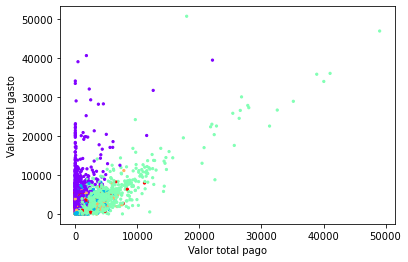

In [23]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

## 07.05 Interpretação visual

In [24]:
import seaborn as sns

dataframe["cluster"] = labels
# sns.pairplot(dataframe[:], hue="cluster")

Note que este tipo de visualização não nos ajuda muito. Será que existem outras maneiras mais eficientes para lidar com clusters?

## 08.04 Descrevendo os atributos

In [26]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,3


In [25]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1071.0  1795.836702  1983.632225   0.000000   506.773698   
1        3281.0   443.767052   846.269966   0.000000    23.390230   
2        1539.0  1144.165942  1664.223404   0.000000   212.743922   
3        2650.0  3037.103867  2478.637457   6.824905  1257.253919   
4         409.0  1989.027555  1858.869791  70.794108  1016.583226   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1088.056301  2317.702916  14581.459140            1071.0  0.861984   
1          82.980060   411.727643   9630.367575            3281.0  0.774457   
2         556.359504  1372.605793  19043.138560            1539.0  0.928301   
3        2172.596565  4223.858877  18495.558550            2650.0  0.963796   
4        1330.716005  2149.205166  11670.179850             409.0  0.989435   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       887.346861  21235.065300           1071.0  0.117296   
1        ...       248.700571   4483.503862           3281.0  0.246761   
2        ...       525.257953  18621.013310           1539.0  0.277969   
3        ...      1330.332500   8345.641905           2650.0  0.001798   
4        ...      7164.306187  76406.207520            409.0  0.019413   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186974  0.0  0.0  0.083333  0.142857  1.0  
1        0.346705  0.0  0.0  0.000000  0.444444  1.0  
2        0.366883  0.0  0.0  0.083333  0.545455  1.0  
3        0.023256  0.0  0.0  0.000000  0.000000  0.6  
4        0.091113  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]